# Classification with Logistic Regression

## 1.1 Fundamentos de la técnica

La Regresión Logística es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación. A diferencia de la regresión lineal que predice valores continuos, la regresión logística predice la probabilidad de que una instancia pertenezca a una categoría específica (generalmente binaria: 0 o 1, "No" o "Sí").

El núcleo de esta técnica es transformar una combinación lineal de variables de entrada en un valor de probabilidad entre 0 y 1, utilizando una función no lineal llamada función sigmoide (o logística). Si la probabilidad es mayor a un umbral (usualmente 0.5), se clasifica como la clase positiva.

## 1.2 Modelo matemático de la técnica

El modelo se basa en la función sigmoide, la cual toma cualquier valor real $z$ y lo mapea al intervalo $(0, 1)$.1. La Ecuación Lineal:Primero, el modelo calcula una suma ponderada de las entradas:$$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$2. La Función Sigmoide:Luego, aplicamos la función logística a $z$:$$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-z}}$$3. Función de Costo (Log Loss):Para encontrar los mejores parámetros ($\beta$), no podemos usar mínimos cuadrados (como en regresión lineal). Usamos la Estimación de Máxima Verosimilitud (MLE). Buscamos maximizar la probabilidad de observar los datos dados los parámetros. Esto se traduce en minimizar la función de costo Log Loss (Entropía Cruzada):$$J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]$$

## 1.3 Descripción de la librería y funciones

Para este ejercicio utilizaremos Python y las librerías estándar de ciencia de datos.

Pandas (`pd`): Estructura y manipulación de datos (DataFrames).

NumPy (`np`): Operaciones matemáticas y manejo de arrays.

Matplotlib / Seaborn: Visualización de datos (Gráficos de dispersión).

Scikit-Learn (`sklearn`):

`LogisticRegression`: Clase principal. Parámetros clave: `solver` (algoritmo de optimización como 'lbfgs' o 'liblinear'), `C` (fuerza de regularización inversa), `max_iter` (iteraciones máximas para converger).

`train_test_split`: Función para dividir el dataset en entrenamiento y prueba.

`confusion_matrix`, accuracy_score: Funciones para evaluar el rendimiento.

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification

# Generación de un Dataset Sintético para el tutorial
# Usamos make_classification para asegurar que tenemos datos aptos para clasificación binaria
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Crear un DataFrame para facilitar la manipulación
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Target'] = y

print("Dataset generado correctamente.")

Dataset generado correctamente.


## 1.4 Pipeline

### Preprocess

En esta etapa realizamos un análisis estadístico descriptivo para entender la distribución de los datos y visualizamos la separación de las clases mediante un Gráfico de Dispersión.

Resumen Estadístico:
        Feature_1   Feature_2      Target
count  200.000000  200.000000  200.000000
mean     0.127291    0.998048    0.500000
std      1.448313    1.029297    0.501255
min     -3.121909   -1.221998    0.000000
25%     -0.886754    0.353238    0.000000
50%      0.100130    0.866166    0.500000
75%      1.110329    1.679383    1.000000
max      3.663322    4.484226    1.000000

Conteo de clases:
Target
1    100
0    100
Name: count, dtype: int64


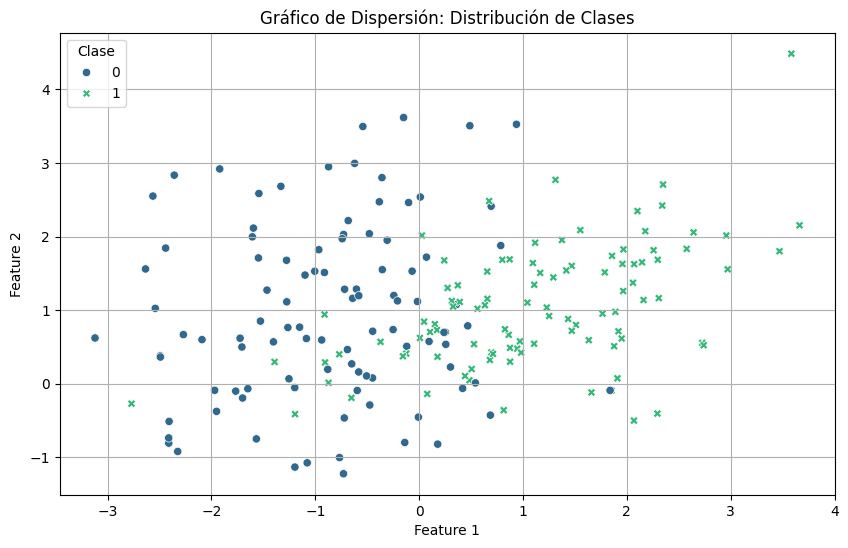

In [3]:
# 1. Análisis estadístico del dataset
print("Resumen Estadístico:")
print(df.describe())

print("\nConteo de clases:")
print(df['Target'].value_counts())

# 2. Despliegue del Gráfico de Dispersión (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature_1', y='Feature_2', hue='Target', palette='viridis', style='Target')
plt.title('Gráfico de Dispersión: Distribución de Clases')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Clase')
plt.grid(True)
plt.show()

### Feature Engineering

El Feature Engineering implica transformar y seleccionar las variables más relevantes para el modelo.

Selección de variables: Para un modelo de Regresión Logística eficaz, debemos seleccionar variables que:

Tengan una correlación con la variable objetivo (Target).

No tengan una alta colinealidad entre ellas (independencia entre features).

Aporten información significativa ("Information Value").

En este ejemplo simplificado, usaremos `Feature_1` y `Feature_2` ya que, como vimos en el gráfico de dispersión, permiten trazar una frontera de decisión clara.

In [4]:
# Selección de variables (Features y Target)
X_data = df[['Feature_1', 'Feature_2']]
y_data = df['Target']

# División del dataset: 80% Entrenamiento, 20% Prueba
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Instanciar y entrenar el modelo
model = LogisticRegression(solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

print("Modelo entrenado exitosamente.")

Modelo entrenado exitosamente.


### Prediction

A continuación, definimos una función que toma un nuevo patrón (datos de entrada) y utiliza el modelo entrenado para estimar a qué clase pertenece.

In [5]:
def predecir_clase(f1, f2):
    """
    Función que recibe un patrón por clasificar y muestra la clase predicha.
    Args:
        f1 (float): Valor para Feature 1
        f2 (float): Valor para Feature 2
    """
    input_data = np.array([[f1, f2]])
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)

    clase = "Clase 1" if prediction[0] == 1 else "Clase 0"
    print(f"Entrada: [{f1}, {f2}] -> Predicción: {clase} (Probabilidad: {probability[0][prediction[0]]:.4f})")

# Probamos la función con valores arbitrarios
predecir_clase(1.5, 1.0)
predecir_clase(-1.5, -2.0)

Entrada: [1.5, 1.0] -> Predicción: Clase 1 (Probabilidad: 0.9234)
Entrada: [-1.5, -2.0] -> Predicción: Clase 0 (Probabilidad: 0.7365)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Model Evaluation

Para validar qué tan bien funciona nuestro modelo, utilizaremos dos métricas fundamentales:1. Matriz de Confusión:Es una tabla que describe el rendimiento del modelo comparando los valores reales con los predichos.Verdaderos Positivos (TP): Predijo 1 y era 1.Verdaderos Negativos (TN): Predijo 0 y era 0.Falsos Positivos (FP): Predijo 1 pero era 0 (Error Tipo I).Falsos Negativos (FN): Predijo 0 pero era 1 (Error Tipo II).ShutterstockExplorar2. Accuracy (Exactitud):Es la proporción de predicciones correctas sobre el total de predicciones. Aunque es útil, puede ser engañosa si las clases están desbalanceadas.
![Foto](https://encrypted-tbn0.gstatic.com/licensed-image?q=tbn:ANd9GcRvt0jcWkCprkTxBXwPZ-Hi1ADuVKHRPQlxrXEmVuDYm7vpHRtkcnnqvKZ2aFcotFy20ZnILY3DMYFxKnD1RyRGYzcG1PcubNvyc0y3sKzzAxGAYaE)
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

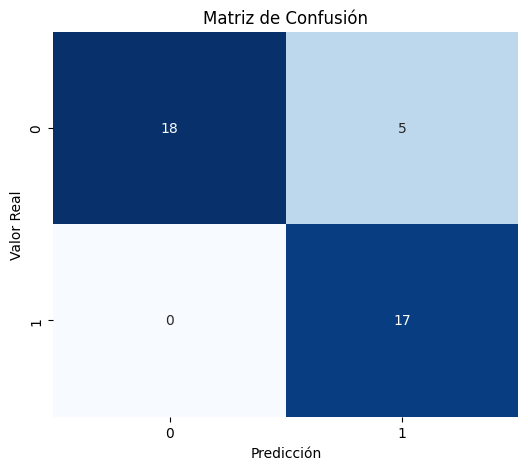


Accuracy del modelo: 0.8750 (87.5%)


In [6]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 1. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# 2. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy del modelo: {acc:.4f} ({acc*100}%)")

## 2 Referencias Bibliográficas

Arora, A. (2020). Logistic Regression — Maximum Likelihood Estimation & Gradient Descent. Medium. Recuperado de [https://medium.com/@ashisharora2204/logistic-regression-maximum-likelihood-estimation-gradient-descent-a7962a452332](https://medium.com/@ashisharora2204/logistic-regression-maximum-likelihood-estimation-gradient-descent-a7962a452332)

P., S. (2020). Logistic Regression: From Probability Distributions. Medium. Recuperado de [https://medium.com/swlh/logistic-regression-from-probability-distributions-7245b7a826b7](https://medium.com/swlh/logistic-regression-from-probability-distributions-7245b7a826b7)